In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import torch
import random

In [185]:
purchase_df = pd.read_csv('/kaggle/input/datathon3-0-problem1-dataset/purchase.csv')
boxes_df = pd.read_csv('/kaggle/input/datathon3-0-problem1-dataset/boxes.csv')

In [186]:
base_date = datetime.date(2018, 10, 1)
purchase_df['day'] = purchase_df['PURCHASE_DATE'].apply(lambda x: (datetime.datetime.strptime(x, '%d/%m/%Y').date() - base_date).days)

In [187]:
purchase_df.drop(['PURCHASE_DATE'], axis=1, inplace=True)

In [188]:
customer_keys = purchase_df['MAGIC_KEY'].unique()
customer_ids = {customer_keys[i]: i for i in range(len(customer_keys))}

In [189]:
purchase_df.drop(purchase_df[purchase_df['BOX_ID'].isnull()].index, inplace=True)
purchase_df.drop(purchase_df[purchase_df['BOX_COUNT'] < 0].index, inplace=True)

In [190]:
purchase_df['BOX_COUNT'] = purchase_df['BOX_COUNT'].astype(int)
purchase_df['BOX_ID'] = purchase_df['BOX_ID'].astype(int)

In [191]:
purchase_df.sample(10)

,MAGIC_KEY,BOX_ID,BOX_COUNT,day
1636289,2C00A3D347E,143,1,55
1910824,296336ADBF2,258,1,31
362313,2BC913C5161,106,1,141
1034842,2BDB7C5F8C3,133,1,118
2064432,2967745B650,258,1,51
7311,2CDEF8AAA93,103,1,123
1325497,2C4322AC499,163,1,75
1648311,2CA27AEDF43,137,1,41
1442197,28EB7B86B02,255,1,79
1143432,2C4402C1A06,163,1,62


In [192]:
len(purchase_df['MAGIC_KEY'].unique())

1274087

In [193]:
len(purchase_df)

2455800

In [194]:
purchases = [[] for _ in range(len(customer_keys))]
purchase_df.apply(lambda x: purchases[customer_ids[x['MAGIC_KEY']]].append((x['BOX_ID'], x['BOX_COUNT'], x['day'])), axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
2455859    None
2455860    None
2455861    None
2455862    None
2455863    None
Length: 2455800, dtype: object

In [195]:
prob2_df =pd.read_csv('/kaggle/input/datathon3-0-problem1-dataset/problem 2.csv')
prob2_df.head()

,MAGIC_KEY
0,2C0B5F97180
1,2C2F659EF00
2,29D629EDF20
3,2A7073E2FF0
4,2A9B9BE1210


In [196]:
prob2_customers = [customer_ids[x] for x in prob2_df['MAGIC_KEY'].unique()]
len(prob2_customers)

# prob2_customers

43518

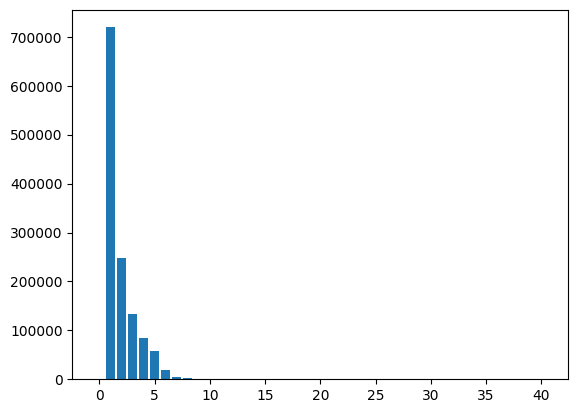

In [197]:
purchase_counts = {}
for i, _ in enumerate(purchases):
    cnt = len(purchases[i])
    if cnt not in purchase_counts:
        purchase_counts[cnt] = 1
    else:
        purchase_counts[cnt] += 1

#generate bar plot from purchase counts
        
import matplotlib.pyplot as plt
plt.bar(purchase_counts.keys(), purchase_counts.values())
plt.show()

In [198]:
purchases[0:10]

[[(12, 1, 123)],
 [(12, 1, 123)],
 [(99, 1, 123), (78, 1, 80)],
 [(6, 1, 123)],
 [(4, 1, 123)],
 [(238, 1, 123),
  (238, 1, 100),
  (238, 1, 80),
  (238, 1, 36),
  (238, 1, 56),
  (238, 1, 14)],
 [(227, 1, 123)],
 [(6, 1, 123)],
 [(204, 1, 123), (203, 1, 79), (203, 1, 49), (237, 1, 19)],
 [(231, 1, 123), (238, 1, 34), (233, 1, 6)]]

In [199]:
for i, _ in enumerate(purchases):
    purchases[i].sort(key=lambda x: x[2])

In [200]:
purchases[0:10]

[[(12, 1, 123)],
 [(12, 1, 123)],
 [(78, 1, 80), (99, 1, 123)],
 [(6, 1, 123)],
 [(4, 1, 123)],
 [(238, 1, 14),
  (238, 1, 36),
  (238, 1, 56),
  (238, 1, 80),
  (238, 1, 100),
  (238, 1, 123)],
 [(227, 1, 123)],
 [(6, 1, 123)],
 [(237, 1, 19), (203, 1, 49), (203, 1, 79), (204, 1, 123)],
 [(233, 1, 6), (238, 1, 34), (231, 1, 123)]]

In [201]:
prob2_cust_purchases_list = []
for cid in prob2_customers:
    prob2_cust_purchases_list.append(purchases[cid])

print(len(prob2_cust_purchases_list))
print(prob2_cust_purchases_list[0:10])

43518
[[(137, 1, 9), (89, 1, 32), (137, 1, 39), (137, 1, 95), (141, 1, 125)], [(143, 1, 11), (143, 1, 40), (143, 1, 69), (144, 1, 100), (144, 1, 129)], [(238, 1, 24), (204, 1, 41), (238, 1, 69), (238, 1, 93), (237, 1, 113), (230, 1, 129), (237, 1, 141)], [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238, 1, 100), (230, 1, 131)], [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270, 1, 119), (270, 1, 143)], [(40, 1, 3), (40, 1, 33), (41, 1, 63), (144, 1, 94), (144, 1, 123)], [(163, 1, 30), (163, 1, 61), (162, 1, 92), (162, 1, 123)], [(144, 1, 102), (144, 1, 131)], [(143, 1, 22), (143, 1, 52), (119, 1, 112), (108, 1, 140)], [(118, 1, 11), (142, 1, 48), (142, 1, 65), (144, 1, 102), (144, 1, 132)]]


In [202]:
data = []
for cid in prob2_customers:
    data.append({
        'MAGIC_KEY': customer_keys[cid],
        'CID': cid,
        'PURCHASE': purchases[cid]
    })
sub_df = pd.DataFrame(data, columns=['MAGIC_KEY','CID','PURCHASE'])


print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE
0  2C0B5F97180   40897  [(137, 1, 9), (89, 1, 32), (137, 1, 39), (137,...
1  2C2F659EF00  123031  [(143, 1, 11), (143, 1, 40), (143, 1, 69), (14...
2  29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...
3  2A7073E2FF0  175927  [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238...
4  2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...


In [203]:
# Assuming sub_df is your existing DataFrame with 'PURCHASE_CLEANED' already populated
# Calculate the length of each list in 'PURCHASE_CLEANED'
sub_df['PURCHASE_LENGTH'] = sub_df['PURCHASE'].apply(len)

# Count the frequency of each list length
length_counts = sub_df['PURCHASE_LENGTH'].value_counts()

# Print the frequency of each list length
print("Frequency of list lengths in PURCHASE:")
print(length_counts)

Frequency of list lengths in PURCHASE:
PURCHASE_LENGTH
4     10413
3      9867
5      9423
2      9331
6      2449
7       973
8       432
9       269
10      149
11       84
12       51
13       37
14       16
15        7
16        6
17        4
19        3
20        1
23        1
18        1
22        1
Name: count, dtype: int64


In [204]:
# Create 'PURCHASE_SEQ' by expanding tuples in 'PURCHASE'
sub_df['PURCHASE_SEQ'] = sub_df['PURCHASE'].apply(
    lambda lst: [item for tup in lst for item in [tup[0]] * tup[1]]
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  2C0B5F97180   40897  [(137, 1, 9), (89, 1, 32), (137, 1, 39), (137,...   
1  2C2F659EF00  123031  [(143, 1, 11), (143, 1, 40), (143, 1, 69), (14...   
2  29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
3  2A7073E2FF0  175927  [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238...   
4  2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   

   PURCHASE_LENGTH                         PURCHASE_SEQ  
0                5             [137, 89, 137, 137, 141]  
1                5            [143, 143, 143, 144, 144]  
2                7  [238, 204, 238, 238, 237, 230, 237]  
3                5            [231, 231, 238, 238, 230]  
4                5            [238, 271, 272, 270, 270]  


In [205]:
# Calculate the length of each list in 'PURCHASE_CLEANED'
sub_df['PURCHASE_SEQ_LENGTH'] = sub_df['PURCHASE_SEQ'].apply(len)

# Count the frequency of each list length
length_counts = sub_df['PURCHASE_SEQ_LENGTH'].value_counts()

# Print the frequency of each list length
print("Frequency of list lengths in PURCHASE_SEQ:")
print(length_counts)

Frequency of list lengths in PURCHASE_SEQ:
PURCHASE_SEQ_LENGTH
4     10404
3      9862
5      9398
2      9325
6      2483
7       979
8       431
9       268
10      153
11       83
12       53
13       37
14       17
15        7
16        6
17        4
20        2
19        2
23        1
28        1
18        1
22        1
Name: count, dtype: int64


In [206]:
#SECOND ORDER

import pandas as pd
from collections import defaultdict

def predict_next_state(seq):
    if len(seq) == 1:
        return seq[0]  # Return the only element in the sequence

    # Use 2nd order Markov chain for sequences of length 2 or more
    transition_probabilities = calculate_probabilities(seq)
    if len(seq) >= 2:
        last_pair = (seq[-2], seq[-1])
        if last_pair in transition_probabilities and transition_probabilities[last_pair]:
            possible_states = sorted(transition_probabilities[last_pair].items(), key=lambda x: x[1], reverse=True)
            return possible_states[0][0]  # Return the state with the highest probability
        else:
            return seq[-1]  # Fall back to the last observed element if no transitions are found

    return None  # Catch-all for any other cases, which shouldn't be needed due to above conditions

def calculate_probabilities(seq):
    transitions = {}
    for i in range(len(seq) - 2):
        pair = (seq[i], seq[i+1])
        next_state = seq[i+2]
        if pair not in transitions:
            transitions[pair] = {}
        if next_state not in transitions[pair]:
            transitions[pair][next_state] = 0
        transitions[pair][next_state] += 1
    
    # Normalize the transition probabilities
    for pair, next_states in transitions.items():
        total = sum(next_states.values())
        transitions[pair] = {state: count / total for state, count in next_states.items()}

    return transitions

# Assuming sub_df is a DataFrame with a column 'PURCHASE_SEQ'
# Apply the prediction function to each row in 'PURCHASE_SEQ'
sub_df['NEXT_BOX'] = sub_df['PURCHASE_SEQ'].apply(predict_next_state)

print(sub_df.head())


     MAGIC_KEY     CID                                           PURCHASE  \
0  2C0B5F97180   40897  [(137, 1, 9), (89, 1, 32), (137, 1, 39), (137,...   
1  2C2F659EF00  123031  [(143, 1, 11), (143, 1, 40), (143, 1, 69), (14...   
2  29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
3  2A7073E2FF0  175927  [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238...   
4  2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   

   PURCHASE_LENGTH                         PURCHASE_SEQ  PURCHASE_SEQ_LENGTH  \
0                5             [137, 89, 137, 137, 141]                    5   
1                5            [143, 143, 143, 144, 144]                    5   
2                7  [238, 204, 238, 238, 237, 230, 237]                    7   
3                5            [231, 231, 238, 238, 230]                    5   
4                5            [238, 271, 272, 270, 270]                    5   

   NEXT_BOX  
0       141  
1       144  
2       237  


In [207]:
# Count the number of rows where 'NEXT_BOX' is NaN
nan_count = sub_df['NEXT_BOX'].isna().sum()

# Print the count of NaN values in 'NEXT_BOX'
print(f"Number of rows with NaN in NEXT_BOX: {nan_count}")

print(len(sub_df))

Number of rows with NaN in NEXT_BOX: 0
43518


In [208]:
#HERE YOU CAN SAVE
submission_df = sub_df[['MAGIC_KEY', 'NEXT_BOX']]

submission_df = submission_df.rename(columns={'NEXT_BOX': 'BOX_ID'})

print(submission_df.head())

submission_df.to_csv('submission_analytical_prob2-appr1_2.csv', index = False)

     MAGIC_KEY  BOX_ID
0  2C0B5F97180     141
1  2C2F659EF00     144
2  29D629EDF20     237
3  2A7073E2FF0     230
4  2A9B9BE1210     270


In [209]:
sub_df['PURCHASE_CLEANED'] = sub_df['PURCHASE'].apply(
    lambda lst: [tup for tup in lst if tup[-1] < 137]
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  2C0B5F97180   40897  [(137, 1, 9), (89, 1, 32), (137, 1, 39), (137,...   
1  2C2F659EF00  123031  [(143, 1, 11), (143, 1, 40), (143, 1, 69), (14...   
2  29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
3  2A7073E2FF0  175927  [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238...   
4  2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   

   PURCHASE_LENGTH                         PURCHASE_SEQ  PURCHASE_SEQ_LENGTH  \
0                5             [137, 89, 137, 137, 141]                    5   
1                5            [143, 143, 143, 144, 144]                    5   
2                7  [238, 204, 238, 238, 237, 230, 237]                    7   
3                5            [231, 231, 238, 238, 230]                    5   
4                5            [238, 271, 272, 270, 270]                    5   

   NEXT_BOX                                   PURCHASE_C

In [210]:
# Create 'PURCHASE_SEQ' by expanding tuples in 'PURCHASE'
sub_df['PURCHASE_CLEANED_SEQ'] = sub_df['PURCHASE_CLEANED'].apply(
    lambda lst: [item for tup in lst for item in [tup[0]] * tup[1]]
)

print(sub_df.head())

     MAGIC_KEY     CID                                           PURCHASE  \
0  2C0B5F97180   40897  [(137, 1, 9), (89, 1, 32), (137, 1, 39), (137,...   
1  2C2F659EF00  123031  [(143, 1, 11), (143, 1, 40), (143, 1, 69), (14...   
2  29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
3  2A7073E2FF0  175927  [(231, 1, 5), (231, 1, 36), (238, 1, 65), (238...   
4  2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   

   PURCHASE_LENGTH                         PURCHASE_SEQ  PURCHASE_SEQ_LENGTH  \
0                5             [137, 89, 137, 137, 141]                    5   
1                5            [143, 143, 143, 144, 144]                    5   
2                7  [238, 204, 238, 238, 237, 230, 237]                    7   
3                5            [231, 231, 238, 238, 230]                    5   
4                5            [238, 271, 272, 270, 270]                    5   

   NEXT_BOX                                   PURCHASE_C

In [211]:
# Assuming sub_df is your existing DataFrame with 'PURCHASE_CLEANED' and 'PURCHASE_SEQ' columns already populated
# Filter rows where the length of 'PURCHASE_CLEANED' is equal to the length of 'PURCHASE_SEQ'
sub_df = sub_df[sub_df['PURCHASE_CLEANED'].apply(len) != sub_df['PURCHASE_SEQ'].apply(len)]

print(sub_df.head())

      MAGIC_KEY     CID                                           PURCHASE  \
2   29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
4   2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   
8   2BEEB2DA940  340888  [(143, 1, 22), (143, 1, 52), (119, 1, 112), (1...   
10  2C242858E80  187249  [(41, 1, 59), (45, 1, 101), (31, 1, 132), (31,...   
15  29A71E82C28  176597  [(238, 1, 7), (238, 1, 35), (237, 1, 67), (231...   

    PURCHASE_LENGTH                         PURCHASE_SEQ  PURCHASE_SEQ_LENGTH  \
2                 7  [238, 204, 238, 238, 237, 230, 237]                    7   
4                 5            [238, 271, 272, 270, 270]                    5   
8                 4                 [143, 143, 119, 108]                    4   
10                4                     [41, 45, 31, 31]                    4   
15                7  [238, 238, 237, 231, 231, 237, 230]                    7   

    NEXT_BOX                                

In [212]:
len(sub_df)

7285

In [213]:
# Assuming sub_df is your existing DataFrame with 'PURCHASE_SEQ' column populated
# Apply the prediction function to each row in 'PURCHASE_SEQ'
sub_df['NEXT_BOX_CLEANED'] = sub_df['PURCHASE_CLEANED_SEQ'].apply(predict_next_state)



print(sub_df.head())

      MAGIC_KEY     CID                                           PURCHASE  \
2   29D629EDF20  138221  [(238, 1, 24), (204, 1, 41), (238, 1, 69), (23...   
4   2A9B9BE1210  391833  [(238, 1, 1), (271, 1, 61), (272, 1, 91), (270...   
8   2BEEB2DA940  340888  [(143, 1, 22), (143, 1, 52), (119, 1, 112), (1...   
10  2C242858E80  187249  [(41, 1, 59), (45, 1, 101), (31, 1, 132), (31,...   
15  29A71E82C28  176597  [(238, 1, 7), (238, 1, 35), (237, 1, 67), (231...   

    PURCHASE_LENGTH                         PURCHASE_SEQ  PURCHASE_SEQ_LENGTH  \
2                 7  [238, 204, 238, 238, 237, 230, 237]                    7   
4                 5            [238, 271, 272, 270, 270]                    5   
8                 4                 [143, 143, 119, 108]                    4   
10                4                     [41, 45, 31, 31]                    4   
15                7  [238, 238, 237, 231, 231, 237, 230]                    7   

    NEXT_BOX                                

In [214]:
# Count the number of rows where 'NEXT_BOX' is NaN
nan_count = sub_df['NEXT_BOX_CLEANED'].isna().sum()

# Print the count of NaN values in 'NEXT_BOX'
print(f"Number of rows with NaN in NEXT_BOX_CLEANED: {nan_count}")

Number of rows with NaN in NEXT_BOX_CLEANED: 0


In [215]:
# Assuming sub_df is your existing DataFrame with 'PURCHASE' and 'NEXT_BOX_CLEANED' columns populated
def extract_target_value(lst):
    # Check if the list is not empty
    if lst:
        # Iterate through each tuple in the list
        for tup in lst:
            # Check if the last element of the tuple is >= 137
            if tup[-1] >= 137:
                # Return the first element of the tuple if condition is met
                return tup[0]
    # Return None if no tuple meets the condition or if the list is empty
    return None

# Assuming 'sub_df' is a pandas DataFrame and 'PURCHASE' is a column containing lists of tuples,
# apply the function to the 'PURCHASE' column to create a new 'TARGET_VALUE' column
sub_df['TARGET_VALUE'] = sub_df['PURCHASE'].apply(extract_target_value)

# Calculate matches between 'NEXT_BOX_CLEANED' and 'TARGET_VALUE'
correct_predictions = (sub_df['NEXT_BOX_CLEANED'] == sub_df['TARGET_VALUE']).sum()
total_predictions = sub_df['NEXT_BOX_CLEANED'].notna().sum()  # Count non-NaN predictions for accuracy calculation

# Calculate accuracy
accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0  # Avoid division by zero

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")  # Display accuracy as a fraction to four decimal places

Accuracy: 0.4073


In [216]:
# Calculate the length of each list in 'PURCHASE_CLEANED'
sub_df['PURCHASE_SEQ_LENGTH'] = sub_df['PURCHASE_CLEANED_SEQ'].apply(len)

# Count the frequency of each list length
length_counts = sub_df['PURCHASE_SEQ_LENGTH'].value_counts()

# Print the frequency of each list length
print("Frequency of list lengths in PURCHASE_SEQ:")
print(length_counts)

Frequency of list lengths in PURCHASE_SEQ:
PURCHASE_SEQ_LENGTH
4     1374
2     1276
1     1154
3     1120
5      972
6      612
7      299
8      192
9      120
10      70
11      37
12      31
13      10
14       7
16       3
15       3
18       2
21       1
20       1
17       1
Name: count, dtype: int64
